In [3]:
!pwd
!ls
!ls train

/d/GH/GitWorkSpace/bank_model_competiton
testaa
train
~$姣旇禌瀛楁�佃В閲�.xlsx
鍒濊禌A姒滄暟鎹�闆�
鏁版嵁鎺㈡煡.ipynb
姣旇禌瀛楁�佃В閲�.xlsx
train.csv
train_bank_statement.csv


In [196]:
import pandas as pd 
import matplotlib.pyplot as plt
import statistics
import datetime
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据探查

In [109]:
df = pd.read_csv('./train/train.csv')
print(df.columns.values)
df.head()

['id' 'title' 'career' 'zip_code' 'residence' 'loan' 'term'
 'interest_rate' 'issue_time' 'syndicated' 'installment' 'record_time'
 'history_time' 'total_accounts' 'balance_accounts' 'balance_limit'
 'balance' 'level' 'label']


,id,title,career,zip_code,residence,loan,term,interest_rate,issue_time,syndicated,installment,record_time,history_time,total_accounts,balance_accounts,balance_limit,balance,level,label
0,0,9,0.0,221373,1,7200,36,10.95,1238631967,0,1,1238630622,472006661,17.0,9.0,36200.0,13856.0,A4,0
1,1,8,10.0,311681,0,21300,36,12.95,1128212052,0,0,1161907665,763779041,17.0,9.0,20400.0,13773.0,B0,1
2,2,8,7.0,271562,1,10400,60,21.05,1249171509,0,0,1383958593,727143443,17.0,9.0,10800.0,2023.0,B4,0
3,3,7,2.0,522083,0,33050,36,16.40,1172882234,0,1,1214353935,687660346,17.0,9.0,24700.0,21992.0,B3,0
4,4,8,3.0,101026,1,5200,36,14.35,1172882384,0,0,1240274527,322012875,17.0,9.0,5100.0,1669.0,B2,1


In [110]:
df['issue_time_format'] = df['issue_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df['record_time_format'] = df['record_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df['history_time_format'] = df['history_time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df.to_csv('./train/train_format.csv')

PermissionError: [Errno 13] Permission denied: './train/train_format.csv'

In [111]:
print('record  > issuce :', df[ df['record_time'] > df['issue_time']].shape)
print('record  < issuce :', df[ df['record_time'] < df['issue_time']].shape)
print('record  == issuce :', df[ df['record_time'] == df['issue_time']].shape)
print('record  > history :', df[ df['record_time'] > df['history_time']].shape)
print('record  < history :', df[ df['record_time'] < df['history_time']].shape)
print('record  == history :', df[ df['record_time'] == df['history_time']].shape)
print(df.shape)

record  > issuce : (23729, 22)
record  < issuce : (29729, 22)
record  == issuce : (22, 22)
record  > history : (53480, 22)
record  < history : (0, 22)
record  == history : (0, 22)
(53480, 22)


<AxesSubplot:xlabel='level,level'>

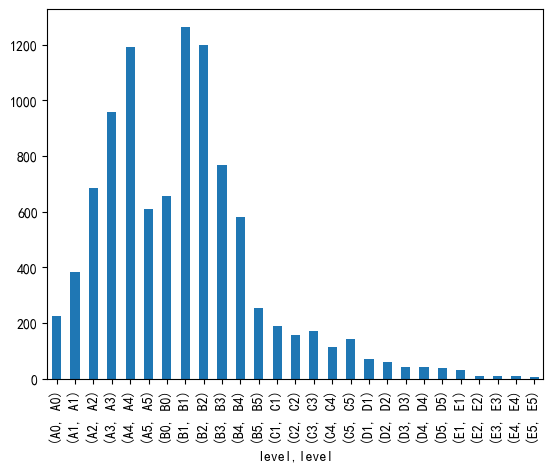

In [192]:
fig,axes=plt.subplots(1,2)

df_1_level = df[df['label'] == 1].groupby('level')['level'].value_counts()
df_1_level.plot(kind='bar')


<AxesSubplot:xlabel='level,level'>

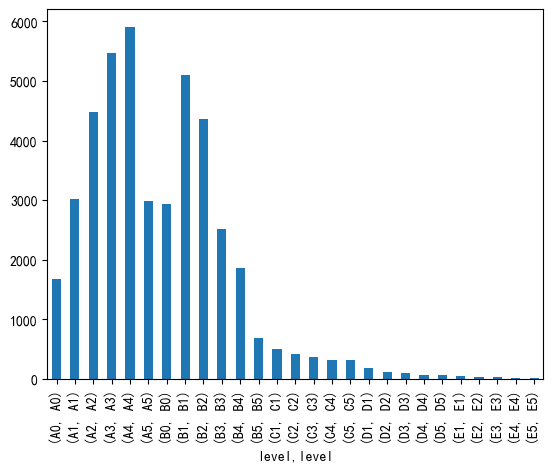

In [194]:
df_0_level = df[df['label'] == 0].groupby('level')['level'].value_counts()
df_0_level.plot(kind='bar')

AttributeError: 'Rectangle' object has no property 'rug'

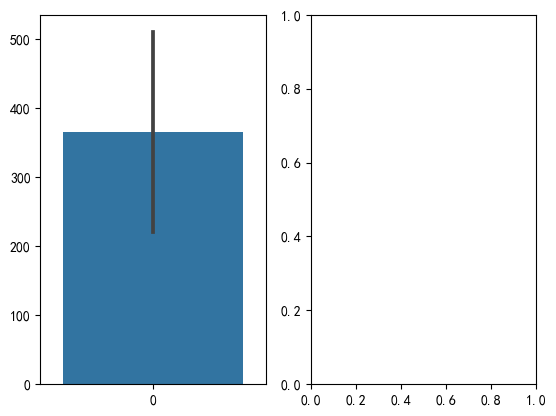

In [199]:
# fig,axes=plt.subplots(1,2)

# sns.barplot(df_1_level, ax=axes[0]) #左图
# sns.barplot(df_0_level, rug=True,ax=axes[1]) #右图

## record time vs issue time

count    53480.000000
mean       -21.650598
std        507.195840
min      -1078.000000
25%       -373.000000
50%          0.000000
75%        179.000000
max       1800.000000
Name: record_issue_day_diff, dtype: float64


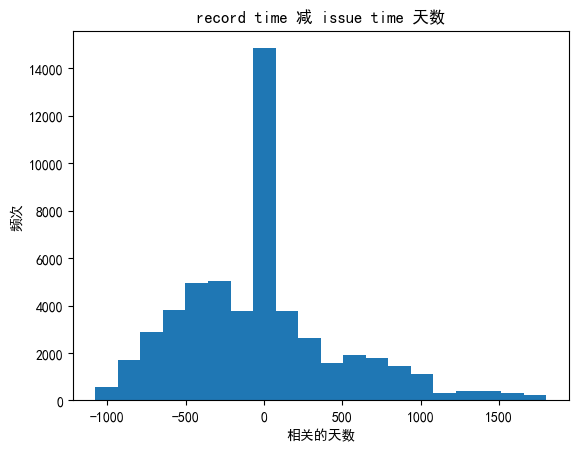

In [112]:
df ['record_issue_day_diff'] = (df['record_time'] - df['issue_time'])/60/60/24
df ['record_issue_day_diff'] = df['record_issue_day_diff'].map(int)
# help(df ['record_issue_day_diff'].hist)
# ax = df ['record_issue_day_diff'].hist(bins=20)
# plt.rcParams['font.sans-serif'] = ['Times New Roman']
print(df ['record_issue_day_diff'].describe())
plt.hist(df['record_issue_day_diff'],bins=20)
plt.title('record time 减 issue time 天数')
plt.xlabel('相关的天数')
plt.ylabel('频次')
plt.show()

# 交易数据

In [11]:
df_bank = pd.read_csv('./train/train_bank_statement.csv')
df_bank

,id,time,direction,amount
0,0,1224115200,0,8771.350000
1,0,1224288000,1,310.650000
2,0,1224460800,1,152.620000
3,0,1225152000,1,20.490000
4,0,1226793600,1,173.170000
...,...,...,...,...
1717413,50371,1159747200,1,133.818723
1717414,50371,1160179200,1,71.777279
1717415,50371,1160956800,0,46.981217
1717416,50371,1161129600,1,160.510592


In [131]:

df_bank['time_format'] = df_bank['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
# df_bank.to_csv('./train/train_bank_statement_format.csv')
df_tx_stat = df_bank.groupby('id')['time_format'].agg(['max','min','count'])

df_concat = pd.concat([df, df_tx_stat] , axis=1)

df_concat.columns

df_concat.rename(columns = {'max': 'tx_time_max', 'min': 'tx_time_min', 'count':'tx_count' }, inplace=True)
df_concat.to_csv('./train/train_concat_tx_time.csv')
print(df_concat.columns)

df_concat['record_tx_max_diff'] = df_concat['record_time_format'] - df_concat['tx_time_max']
df_concat['record_tx_max_diff'].map(lambda x : x.days)

df_concat[['record_time_format','tx_time_max','record_tx_max_diff']]

Index(['id', 'title', 'career', 'zip_code', 'residence', 'loan', 'term',
       'interest_rate', 'issue_time', 'syndicated', 'installment',
       'record_time', 'history_time', 'total_accounts', 'balance_accounts',
       'balance_limit', 'balance', 'level', 'label', 'issue_time_format',
       'record_time_format', 'history_time_format', 'record_issue_day_diff',
       'record_tx_max_diff', 'tx_time_max', 'tx_time_min', 'tx_count'],
      dtype='object')


,record_time_format,tx_time_max,record_tx_max_diff
0,2009-04-02 08:03:42,2009-03-28 08:00:00,5 days 00:03:42
1,2006-10-27 08:07:45,NaT,NaT
2,2013-11-09 08:56:33,2013-11-09 08:00:00,0 days 00:56:33
3,2008-06-25 08:32:15,NaT,NaT
4,2009-04-21 08:42:07,2009-03-29 08:00:00,23 days 00:42:07
...,...,...,...
53475,2006-09-07 08:00:00,NaT,NaT
53476,2006-01-31 08:00:00,NaT,NaT
53477,2005-02-19 08:00:00,2006-10-22 08:00:00,-610 days +00:00:00
53478,2006-10-01 08:00:00,NaT,NaT


In [138]:
df_bank = pd.read_csv('./train/train_bank_statement.csv')
df_bank['time_format'] = df_bank['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
# df_tx_stat = df_bank.groupby('id')['time_format'].agg(['max','min','count'])
tx_dict = {key: group for key, group in df_bank.groupby('id')}
tx_dict

{0:     id        time  direction    amount         time_format
 0    0  1224115200          0   8771.35 2008-10-16 08:00:00
 1    0  1224288000          1    310.65 2008-10-18 08:00:00
 2    0  1224460800          1    152.62 2008-10-20 08:00:00
 3    0  1225152000          1     20.49 2008-10-28 08:00:00
 4    0  1226793600          1    173.17 2008-11-16 08:00:00
 5    0  1226793600          0  10638.10 2008-11-16 08:00:00
 6    0  1226966400          1    282.60 2008-11-18 08:00:00
 7    0  1227139200          1    167.55 2008-11-20 08:00:00
 8    0  1227225600          1    253.57 2008-11-21 08:00:00
 9    0  1227312000          1    616.38 2008-11-22 08:00:00
 10   0  1227398400          1   1301.06 2008-11-23 08:00:00
 11   0  1227571200          1    366.02 2008-11-25 08:00:00
 12   0  1227744000          1      2.01 2008-11-27 08:00:00
 13   0  1227830400          1   1127.31 2008-11-28 08:00:00
 14   0  1228003200          1    276.68 2008-11-30 08:00:00
 15   0  1228176000  

In [177]:
num = 0
for k,v in tx_dict.items():
#     print(k,v.values)
    l = v.values
#     print(l)
    tm_max = max(map(lambda x : x[4], l))
    tm_min = min(map(lambda x : x[4], l))
    tx_1 = filter(lambda x : x[2] == 1, l)
    tx_0 = filter( lambda x : x[2] == 0, l)
#     print(list(map(lambda x : x[3],l)))
    total_amount = sum(list(map(lambda x : x[3], l)))
    amount_1 =sum(list(map(lambda x : x[3], tx_1)))
    amount_0 = sum(list(map(lambda x : x[3], tx_0)))
    tm_count = len(l)
    days_diff = (tm_max - tm_min).days
    total_amount_day_avg = total_amount / days_diff
    amount_1_day_avg = amount_1 / days_diff
    amount_0_day_avg = amount_0 / days_diff
    print(k, tm_min, tm_max,  days_diff, tm_count, total_amount, amount_1, amount_0,total_amount_day_avg,amount_1_day_avg, amount_0_day_avg)
    num += 1 
    if num > 10 :
        break

0 2008-10-16 08:00:00 2009-03-28 08:00:00 163 48 71786.99999999999 12079.499999999996 59707.5 440.4110429447852 74.10736196319016 366.3036809815951
2 2013-05-13 08:00:00 2013-11-09 08:00:00 180 48 22406.099999999995 15883.719999999998 6522.38 124.47833333333331 88.24288888888887 36.23544444444445
4 2008-10-11 08:00:00 2009-03-29 08:00:00 169 93 51163.0 30823.099999999995 20339.899999999998 302.7396449704142 182.38520710059169 120.35443786982248
6 2008-03-06 08:00:00 2008-09-01 08:00:00 179 61 41733.77 15385.269999999999 26348.5 233.14955307262568 85.95122905027932 147.19832402234636
7 2007-08-12 08:00:00 2008-02-03 08:00:00 175 66 59958.01000000002 22642.759999999995 37315.25 342.6172000000001 129.38719999999998 213.23
11 2006-08-16 08:00:00 2007-02-02 08:00:00 170 83 47281.18000000001 26862.43 20418.749999999996 278.12458823529414 158.01429411764707 120.11029411764704
12 2007-11-17 08:00:00 2008-05-01 08:00:00 166 32 22975.850000000002 14362.919999999998 8612.93 138.40873493975906 86.

In [ ]:
num = 0
for k,v in tx_dict.items():
    print(k,v.values)
    
    
    num += 1 
    if num > 10 :
        break
